In [1]:
import pandas as pd
import langdetect
from pandarallel import pandarallel
#import nltk as nltk
#nltk.download('stopwords')
from bertopic import BERTopic
from tqdm import tqdm
tqdm.pandas()
#from nltk.corpus import stopwords
pandarallel.initialize(progress_bar=True)
import spacy
from spacy.lang.en.stop_words import STOP_WORDS


/opt/conda/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
ner = pd.read_parquet('cleaned.parquet', engine='pyarrow')
ner.shape
ner= ner.dropna()

In [6]:
ner.tail(1)

,url,date,language,title,text,text_cl,text_clean,text_clean1
174816,https://www.hotnewhiphop.com/facebook-apologiz...,2021-09-08,en,Facebook Apologizes After AI Dubs Black Men To...,Facebook Apologizes After AI Dubs Black Men To...,facebook apologizes after ai dubs black men to...,"[facebook, apologizes, ai, dubs, black, men, p...",facebook apologizes ai dubs black men primates...


In [5]:
!python3 -m spacy download en_core_web_sm
nlp=spacy.load('en_core_web_sm',enable= ['ner'], disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer"])
spacy.require_gpu()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 68.2 MB/s eta 0:00:0000:010:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


True

In [ ]:
#nerdoc = ner['text_cl'].tolist()
#nlp.pipe(nerdoc)

In [ ]:
docsner = ner['text_cl'].progress_apply(lambda x: nlp(x))

 97% 97050/100086 [1:34:39<02:41, 18.81it/s]  

In [ ]:
dfner = docsner.to_frame(name="NER")
dfner

In [14]:
ner['Name']= docsner.progress_apply(lambda x: [ent.text for ent in x.ents if ent.label_ == 'PERSON'])
ner['Org']= docsner.progress_apply(lambda x: [ent.text for ent in x.ents if ent.label_ == 'ORG'])
ner['Place']= docsner.progress_apply(lambda x: [ent.text for ent in x.ents if ent.label_ == 'GPE'])


100% 100086/100086 [00:19<00:00, 5052.14it/s]
100% 100086/100086 [00:19<00:00, 5006.29it/s]
100% 100086/100086 [00:20<00:00, 4990.06it/s]


In [ ]:
ner.to_parquet('finalner.parquet')

In [ ]:
x = pd.read_parquet("finalner.parquet",engine=p)

In [17]:
docsner

0         (chatgpt, rising, popularity, s, parent,   , k...
1         (fatbrain, acquires, prime, source, accelerati...
2         (making, ai, algorithms, work,   , sciencedail...
3         (b2b, marketers, accelerate, ai, deliver, seam...
4         (openai, announces, chatgpt, whisper, apis, de...
                                ...                        
100081    (baidu, win, china, approval, ai, models, tele...
100082    (5, things, know, december, 9, pandemic, trans...
100083    (dubber, acquires, world, class, ai, technolog...
100084    (salesforces, ai, ethics, chief, shares, safel...
100085    (facebook, apologizes, ai, dubs, black, men, p...
Name: text_clean1, Length: 100086, dtype: object

In [16]:
ner.head(10)

,url,date,language,title,text,sentiment,Topics,senti_score,text_clean1,Name,Org,Place
0,https://kfor.com/news/nexstar-media-wire/with-...,2023-01-29,en,"With ChatGPT rising in popularity, what’s a pa...",\n\n \n\n \n\nWith ChatGPT rising in popular...,"{'label': 'positive', 'score': 0.8676286935806...",news,0.867629,chatgpt rising popularity s parent kfor.com ...,"[nye contests, matt albert, albert, albert, da...","[automotive news press, ohio amber, media inc ...","[oklahoma city, oklahoma city, oklahoma city, ..."
1,https://www.kalb.com/prnewswire/2022/06/28/fat...,2022-06-28,en,"FatBrain Acquires Prime Source, Accelerating A...","FatBrain Acquires Prime Source, Accelerating A...","{'label': 'positive', 'score': 0.9412379264831...",news,0.941238,fatbrain acquires prime source accelerating ai...,"[st francis cabrini, peter b. ritz, dr rajarsh...","[bureaupowernationinvestigate tvlatest, ailzg ...","[us56, united states, washington]"
2,https://www.sciencedaily.com/releases/2021/05/...,2023-11-30,en,Making AI algorithms show their work | Science...,\n\nMaking AI algorithms show their work | Sci...,"{'label': 'neutral', 'score': 0.9987745881080627}",medical,0.499387,making ai algorithms work sciencedaily sou...,"[peter koo, koo know, luis sandoval, peter k. ...","[science news, koo, koo]","[chicago, enviro]"
3,https://im-news.com/how-b2b-marketers-can-acce...,2022-01-30,en,How B2B marketers can accelerate AI to deliver...,\n\nHow B2B marketers can accelerate AI to del...,"{'label': 'positive', 'score': 0.9980352520942...",market,0.998035,b2b marketers accelerate ai deliver seamless d...,[https blogs.oracle.commarketingcloudpostb2bma...,[],[]
4,https://www.canindia.com/openai-announces-chat...,2023-03-02,en,"OpenAI announces ChatGPT, Whisper APIs for dev...","\n\nOpenAI announces ChatGPT, Whisper APIs fo...","{'label': 'positive', 'score': 0.9042868614196...",technology,0.904287,openai announces chatgpt whisper apis develope...,"[community diaspora india, community diaspora ...","[canindia, apps services application programmi...","[china, lebanon, lebanon, india]"
5,https://www.producthunt.com/posts/simulai-2,2023-05-29,en,simulai - Use AI to generate your blog automa...,simulai - Use AI to generate your blog automa...,"{'label': 'neutral', 'score': 0.9998539686203003}",news,0.499927,simulai use ai generate blog automatically s...,[simulaisee simulais],[],[]
6,https://www.onenewspage.com/n/Internet/1zn2qc8...,2021-07-05,en,Tesla’s AI chief: Self-driving cars don’t need...,\n\n\nTesla’s AI chief: Self-driving cars don’...,"{'label': 'neutral', 'score': 0.9998338222503662}",news,0.499917,teslas ai chief selfdriving cars nt need new...,"[joe biden , blake shelton, kate middleton,...","[sci tech, u.s sports news, al, abc, bloomberg...","[united kingdom , australia, india, united ..."
7,https://www.kfyrtv.com/prnewswire/2023/08/28/b...,2023-08-28,en,Bright Pattern Partners with MoData in South A...,Bright Pattern Partners with MoData in South A...,"{'label': 'positive', 'score': 0.9993875026702...",technology,0.999388,bright pattern partners modata south africa tr...,"[brendan van staaden, michael mccloskey, modat...","[watchpromotionsnd, media group inc station, g...","[south africa, south africa, san francisco, so..."
8,https://www.latestly.com/agency-news/latest-ne...,2021-05-06,en,Latest News | Industry Should Start Working on...,\nLatest News | Industry Should Start Working ...,"{'label': 'negative', 'score': 0.9823808670043...",market,-0.982381,latest news industry start working ai m2 m d...,"[m2, covid19, covid19, united midfielder, mich...","[roma europa league, uefa champions league fin...","[manchester city, london, mumbai, india, mumba..."
9,https://www.wabi.tv/prnewswire/2023/05/11/sap-...,2023-05-11,en,SAP and Google Cloud Expand Partnership to Bui...,SAP and Google Cloud Expand Partnership to Bui...,"{'label': 'positive', 'score': 0.990096926689148}",technology,0.990097,sap google cloud expand partnership build futu...,"

In [18]:
ner.to_parquet('ner.parquet')

In [2]:
df = pd.read_parquet('ner.parquet',engine='pyarrow')

In [3]:
df.head(20)

,url,date,language,title,text,sentiment,Topics,senti_score,text_clean1,Name,Org,Place
0,https://kfor.com/news/nexstar-media-wire/with-...,2023-01-29,en,"With ChatGPT rising in popularity, what’s a pa...",\n\n \n\n \n\nWith ChatGPT rising in popular...,"{'label': 'positive', 'score': 0.8676286935806...",news,0.867629,chatgpt rising popularity s parent kfor.com ...,"[nye contests, matt albert, albert, albert, da...","[automotive news press, ohio amber, media inc ...","[oklahoma city, oklahoma city, oklahoma city, ..."
1,https://www.kalb.com/prnewswire/2022/06/28/fat...,2022-06-28,en,"FatBrain Acquires Prime Source, Accelerating A...","FatBrain Acquires Prime Source, Accelerating A...","{'label': 'positive', 'score': 0.9412379264831...",news,0.941238,fatbrain acquires prime source accelerating ai...,"[st francis cabrini, peter b. ritz, dr rajarsh...","[bureaupowernationinvestigate tvlatest, ailzg ...","[us56, united states, washington]"
2,https://www.sciencedaily.com/releases/2021/05/...,2023-11-30,en,Making AI algorithms show their work | Science...,\n\nMaking AI algorithms show their work | Sci...,"{'label': 'neutral', 'score': 0.9987745881080627}",medical,0.499387,making ai algorithms work sciencedaily sou...,"[peter koo, koo know, luis sandoval, peter k. ...","[science news, koo, koo]","[chicago, enviro]"
3,https://im-news.com/how-b2b-marketers-can-acce...,2022-01-30,en,How B2B marketers can accelerate AI to deliver...,\n\nHow B2B marketers can accelerate AI to del...,"{'label': 'positive', 'score': 0.9980352520942...",market,0.998035,b2b marketers accelerate ai deliver seamless d...,[https blogs.oracle.commarketingcloudpostb2bma...,[],[]
4,https://www.canindia.com/openai-announces-chat...,2023-03-02,en,"OpenAI announces ChatGPT, Whisper APIs for dev...","\n\nOpenAI announces ChatGPT, Whisper APIs fo...","{'label': 'positive', 'score': 0.9042868614196...",technology,0.904287,openai announces chatgpt whisper apis develope...,"[community diaspora india, community diaspora ...","[canindia, apps services application programmi...","[china, lebanon, lebanon, india]"
5,https://www.producthunt.com/posts/simulai-2,2023-05-29,en,simulai - Use AI to generate your blog automa...,simulai - Use AI to generate your blog automa...,"{'label': 'neutral', 'score': 0.9998539686203003}",news,0.499927,simulai use ai generate blog automatically s...,[simulaisee simulais],[],[]
6,https://www.onenewspage.com/n/Internet/1zn2qc8...,2021-07-05,en,Tesla’s AI chief: Self-driving cars don’t need...,\n\n\nTesla’s AI chief: Self-driving cars don’...,"{'label': 'neutral', 'score': 0.9998338222503662}",news,0.499917,teslas ai chief selfdriving cars nt need new...,"[joe biden , blake shelton, kate middleton,...","[sci tech, u.s sports news, al, abc, bloomberg...","[united kingdom , australia, india, united ..."
7,https://www.kfyrtv.com/prnewswire/2023/08/28/b...,2023-08-28,en,Bright Pattern Partners with MoData in South A...,Bright Pattern Partners with MoData in South A...,"{'label': 'positive', 'score': 0.9993875026702...",technology,0.999388,bright pattern partners modata south africa tr...,"[brendan van staaden, michael mccloskey, modat...","[watchpromotionsnd, media group inc station, g...","[south africa, south africa, san francisco, so..."
8,https://www.latestly.com/agency-news/latest-ne...,2021-05-06,en,Latest News | Industry Should Start Working on...,\nLatest News | Industry Should Start Working ...,"{'label': 'negative', 'score': 0.9823808670043...",market,-0.982381,latest news industry start working ai m2 m d...,"[m2, covid19, covid19, united midfielder, mich...","[roma europa league, uefa champions league fin...","[manchester city, london, mumbai, india, mumba..."
9,https://www.wabi.tv/prnewswire/2023/05/11/sap-...,2023-05-11,en,SAP and Google Cloud Expand Partnership to Bui...,SAP and Google Cloud Expand Partnership to Bui...,"{'label': 'positive', 'score': 0.990096926689148}",technology,0.990097,sap google cloud expand partnership build futu...,"

In [6]:
dfname = df1.explode('Name')

In [7]:
dfname['Name'].value_counts()[:60]

Name
covid19                                    28817
https                                      15632
multimedia https                           12128
sam altman                                  8780
taylor                                      5073
app google                                  2729
joe biden                                   2530
apps                                        2473
johnson                                     2362
eu                                          2041
mike                                        1960
max                                         1930
chris                                       1870
matt obrien                                 1817
donald trump                                1680
kim kardashian                              1627
satya nadella                               1620
mark zuckerberg                             1545
williams                                    1543
paul                                        1528
khan           

In [8]:
n = ['sam altman','taylor','joe biden','donald trump','kim kardashian','satya nadella','mark zuckerberg','rishi','pichai','jeff','putin','kamala harris','elon musk']

In [9]:
namename = dfname[dfname['Name'].isin(n)]

In [37]:
name_sent = namename.groupby('Name')['senti'].mean()
name_sent
name_sent = name_sent.reset_index()
name_sent
name_s = name_sent['senti']
name_s.index = name_sent['Name']
name_s = pd.Series(name_s).to_dict()
name_s

{'donald trump': 0.6924032969347068,
 'elon musk': 0.706853260410243,
 'jeff': 0.7508097492964325,
 'joe biden': 0.7028140126834274,
 'kamala harris': 0.7055237465297544,
 'kim kardashian': 0.6137481136452441,
 'mark zuckerberg': 0.6919235889039764,
 'pichai': 0.7370961119225456,
 'putin': 0.656306134518455,
 'rishi': 0.7038284669654045,
 'sam altman': 0.669307022497635,
 'satya nadella': 0.7327059688244336,
 'taylor': 0.6492719767409952}

In [11]:
dforg = df1.explode('Org')

In [12]:
dforg['Org'].value_counts()[:60]

Org
microsoft                    50630
google                       28355
fcc                          21251
ibm                          18628
gray television inc          15961
media group inc station      15721
intel                        10256
gpt                           9731
samsung                       9130
congress                      8479
fda                           7594
media group inc               7466
npr                           7026
white house                   6897
cnn                           5819
cbs                           4969
sec                           4931
un                            4564
quantum                       4319
pbs                           4175
npr news                      4163
senate                        4026
media inc                     3754
sony                          3634
gpt3                          3348
nasa                          3222
ford                          3155
fed                           3061
supreme court   

In [13]:
o = ['microsoft','google','ibm','intel','gpt','samsung','white house','cnn','apple','pentagon','sony','ford','androd','nvidia']

In [39]:
#namename = dfname[dfname['Name'].isin(n)]
org_sent = dforg[dforg['Org'].isin(o)].groupby('Org')['senti'].mean()
org_sent
org_sent = org_sent.reset_index()
org_sent
o_s = org_sent['senti']
o_s.index = org_sent['Org']
o_s = pd.Series(o_s).to_dict()
o_s

{'apple': 0.6990278448478575,
 'cnn': 0.7130764490443828,
 'ford': 0.7132906162512095,
 'google': 0.7525396510156199,
 'gpt': 0.7652279813780151,
 'ibm': 0.8438281666917019,
 'intel': 0.8362641723841056,
 'microsoft': 0.7711630751008034,
 'nvidia': 0.8022429358705845,
 'pentagon': 0.6896315280844284,
 'samsung': 0.7923555443683171,
 'sony': 0.7547035131297993,
 'white house': 0.7216187935472139}

In [15]:
dfplace = df1.explode('Place')
dfplace['Place'].value_counts()[:60]

Place
india             44752
china             26868
new york          20417
california        17535
washington        16371
texas             16297
japan             14765
florida           13997
russia            13615
france            13537
canada            11608
germany           11205
israel            11197
london            10909
united states     10821
italy              9050
spain              8784
brazil             8383
georgia            8072
colorado           7743
netherlands        6989
taiwan             6987
singapore          6902
san francisco      6807
pennsylvania       6434
ohio               6061
south korea        5982
pakistan           5530
los angeles        5517
virginia           5442
poland             5348
mexico             5315
hong kong          5254
australia          5232
illinois           5180
new zealand        5109
kansas             5100
arizona            5012
paris              4955
saudi arabia       4808
malaysia           4729
north caro

In [40]:
p = ['india','china','japan','russia','canada','france','germany','israel','london','united states','italy','spain','new york']
p_sent = dfplace[dfplace['Place'].isin(p)].groupby('Place')['senti'].mean()
#p_sent= pd.DataFrame(p_sent,p_sent.index,columns=['values','index'])
p_sent = p_sent.reset_index()
p_sent
p_s = p_sent['senti']
p_s.index = p_sent['Place']
p_s = pd.Series(p_s).to_dict()
p_s

{'canada': 0.7439254571127221,
 'china': 0.7513771455502588,
 'france': 0.7711976442820406,
 'germany': 0.7687955672243034,
 'india': 0.7656646164344583,
 'israel': 0.7420025904556358,
 'italy': 0.7556313751952424,
 'japan': 0.7809831703920264,
 'london': 0.729702634414292,
 'new york': 0.7277908775518811,
 'russia': 0.7435732361784849,
 'spain': 0.7772898043124157,
 'united states': 0.7877637507170012}

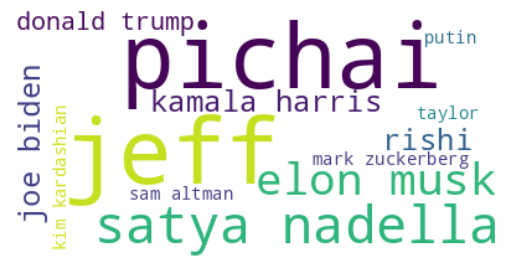

In [41]:
wc = WordCloud(background_color="white", max_words=1000)
wc.generate_from_frequencies(name_s)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

100% 100086/100086 [00:00<00:00, 455464.95it/s]


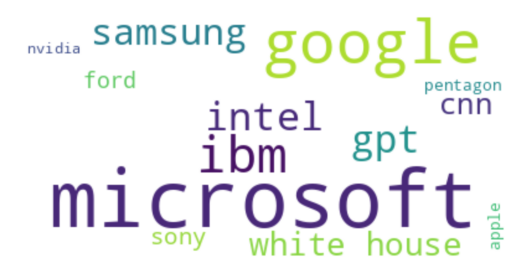

In [29]:
wc = WordCloud(background_color="white", max_words=1000)
prods = []
for i in tqdm(df1['Org']):
    prods.extend(i)
prods = pd.Series(prods)[pd.Series(prods).isin(o)].value_counts().to_dict()
wc.generate_from_frequencies(prods)
plt.imshow(wc, interpolation="quadric")
plt.axis("off")
plt.show()

100% 100086/100086 [00:00<00:00, 481430.59it/s]


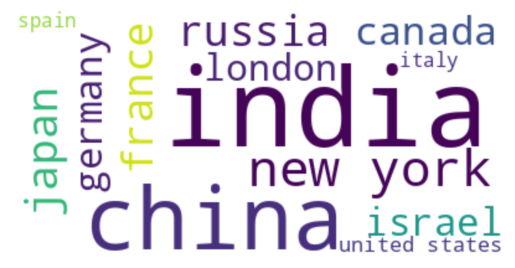

In [44]:
wc = WordCloud(background_color="white", max_words=1000)
prods = []
for i in tqdm(df1['Place']):
    prods.extend(i)
prods = pd.Series(prods)[pd.Series(prods).isin(p)].value_counts().to_dict()
wc.generate_from_frequencies(prods)
plt.imshow(wc, interpolation="quadric")
plt.axis("off")
plt.show()

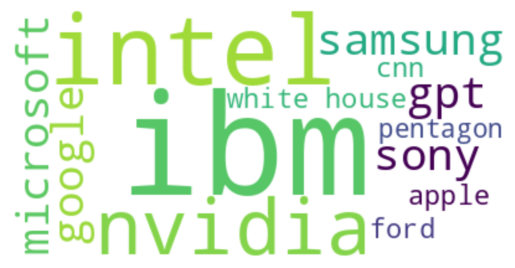

In [46]:
wc = WordCloud(background_color="white", max_words=1000)
wc.generate_from_frequencies(o_s)
plt.imshow(wc, interpolation="quadric")
plt.axis("off")
plt.show()

In [93]:
qazz = pd.concat([name_sent,org_sent,p_sent],axis=1)

,Name,senti,Org,senti,Place,senti
0,donald trump,0.692403,apple,0.699028,canada,0.743925
1,elon musk,0.706853,cnn,0.713076,china,0.751377
2,jeff,0.750810,ford,0.713291,france,0.771198
3,joe biden,0.702814,google,0.752540,germany,0.768796
4,kamala harris,0.705524,gpt,0.765228,india,0.765665
5,kim kardashian,0.613748,ibm,0.843828,israel,0.742003
6,mark zuckerberg,0.691924,intel,0.836264,italy,0.755631
7,pichai,0.737096,microsoft,0.771163,japan,0.780983
8,putin,0.656306,nvidia,0.802243,london,0.729703
9,rishi,0.703828,pentagon,0.689632,new york,0.727791


In [6]:
df1['date'] = df1['date'].progress_apply(lambda x: pd.to_datetime(x))
df1['yearMonth'] = df1['date'].dt.to_period("M")
#df[df['topics'] == 'ai'].groupby(['yearMonth'])['sentiment'].mean().plot(kind = 'line')

100% 100086/100086 [00:10<00:00, 9807.65it/s]


In [110]:
df1.head(2)

,index,url,date,language,title,text,sentiment,Topics,senti_score,text_clean1,Name,Org,Place,senti,yearMonth
0,0,https://kfor.com/news/nexstar-media-wire/with-...,2023-01-29 00:00:00,en,"With ChatGPT rising in popularity, what’s a pa...",\n\n \n\n \n\nWith ChatGPT rising in popular...,"{'label': 'positive', 'score': 0.8676286935806...",news,0.867629,chatgpt rising popularity s parent kfor.com ...,"[nye contests, matt albert, albert, albert, da...","[automotive news press, ohio amber, media inc ...","[oklahoma city, oklahoma city, oklahoma city, ...",1.041154,2023-01
1,1,https://www.kalb.com/prnewswire/2022/06/28/fat...,2022-06-28 00:00:00,en,"FatBrain Acquires Prime Source, Accelerating A...","FatBrain Acquires Prime Source, Accelerating A...","{'label': 'positive', 'score': 0.9412379264831...",news,0.941238,fatbrain acquires prime source accelerating ai...,"[st francis cabrini, peter b. ritz, dr rajarsh...","[bureaupowernationinvestigate tvlatest, ailzg ...","[us56, united states, washington]",1.129486,2022-06


In [13]:
df1.loc[df1['Topics'] == 'market','Topics'] = 'education'
df1['Topics'].unique()

array(['news', 'medical', 'education', 'technology', 'legal', 'vehicles',
       'chatgpt', 'politics', 'social media', 'industry', 'stocks',
       'music', 'art', 'sports', 'weather', 'finance'], dtype=object)

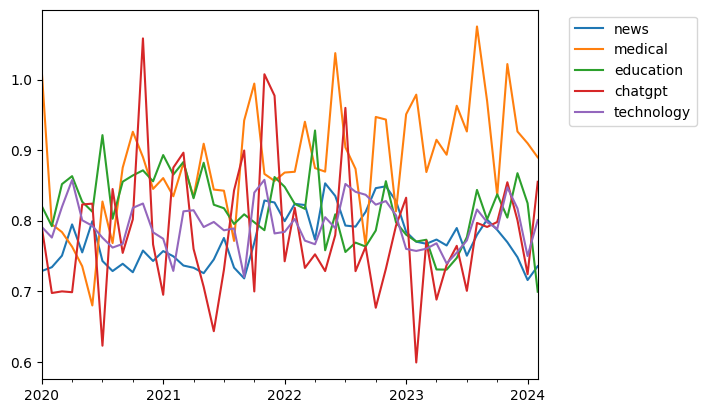

In [23]:
topdate = df1[df1['Topics'].isin(['news','medical','education','chatgpt','technology'])].groupby(['yearMonth', 'Topics'])['senti'].mean()
plot = pd.DataFrame([],columns = ['news','medical','education','chatgpt','technology'],index = df1['yearMonth'].sort_values().unique().tolist())
topdate = topdate.reset_index()
for i,r in topdate.iterrows():
    plot.loc[r['yearMonth'],r['Topics']] = r['senti']
plot = plot.fillna(value = 0)
plot.plot(kind = "line")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot


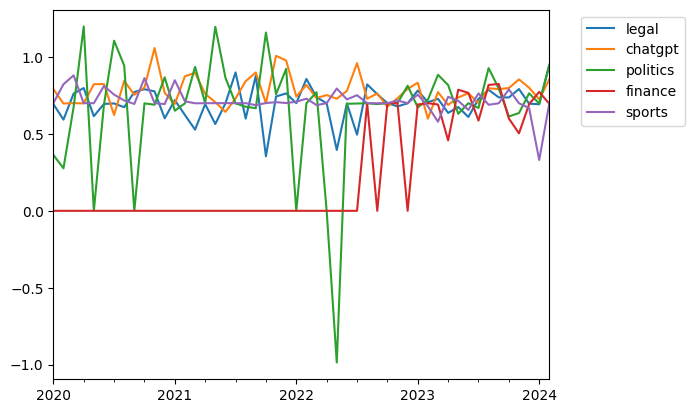

In [24]:
topdate = df1[df1['Topics'].isin(['legal','chatgpt','politics','finance','sports'])].groupby(['yearMonth', 'Topics'])['senti'].mean()
plot = pd.DataFrame([],columns = ['legal','chatgpt','politics','finance','sports'],index = df1['yearMonth'].sort_values().unique().tolist())
topdate = topdate.reset_index()
for i,r in topdate.iterrows():
    plot.loc[r['yearMonth'],r['Topics']] = r['senti']
plot = plot.fillna(value = 0)
plot.plot(kind = "line")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot


In [95]:
qazz.to_csv('nersent.csv')

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100086 entries, 0 to 100085
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        100086 non-null  int64  
 1   url          100086 non-null  object 
 2   date         100086 non-null  object 
 3   language     100086 non-null  object 
 4   title        100086 non-null  object 
 5   text         100086 non-null  object 
 6   sentiment    100086 non-null  object 
 7   Topics       100086 non-null  object 
 8   senti_score  100086 non-null  float64
 9   text_clean1  100086 non-null  object 
 10  Name         100086 non-null  object 
 11  Org          100086 non-null  object 
 12  Place        100086 non-null  object 
 13  senti        100086 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 10.7+ MB


In [20]:
sa = pd.read_parquet('clean+topic_mapped.parquet',engine='pyarrow')

In [24]:
sa= sa.dropna()

In [38]:
sa['sentlabel'] = sa['sentiment'].apply(lambda x: x['label'])
sa['sentscore'] = sa['sentiment'].apply(lambda x: x['score'])
sent = dict.fromkeys(sa['sentlabel'].unique())
sent['positive']= 1.2
sent['negative']= -1
sent['neutral']= 0.7
sa['sentlabel']=sa['sentlabel'].map(sent)
sa['senti']= sa['sentlabel']*sa['sentscore']

In [41]:
sa.head()

,index,url,date,language,title,text,sentiment,Topics,text_clean1,senti
0,0,https://kfor.com/news/nexstar-media-wire/with-...,2023-01-29,en,"With ChatGPT rising in popularity, what’s a pa...",\n\n \n\n \n\nWith ChatGPT rising in popular...,"{'label': 'positive', 'score': 0.8676286935806...",news,chatgpt rising popularity s parent kfor.com ...,1.041154
1,1,https://www.kalb.com/prnewswire/2022/06/28/fat...,2022-06-28,en,"FatBrain Acquires Prime Source, Accelerating A...","FatBrain Acquires Prime Source, Accelerating A...","{'label': 'positive', 'score': 0.9412379264831...",news,fatbrain acquires prime source accelerating ai...,1.129486
2,2,https://www.sciencedaily.com/releases/2021/05/...,2023-11-30,en,Making AI algorithms show their work | Science...,\n\nMaking AI algorithms show their work | Sci...,"{'label': 'neutral', 'score': 0.9987745881080627}",medical,making ai algorithms work sciencedaily sou...,0.699142
3,3,https://im-news.com/how-b2b-marketers-can-acce...,2022-01-30,en,How B2B marketers can accelerate AI to deliver...,\n\nHow B2B marketers can accelerate AI to del...,"{'label': 'positive', 'score': 0.9980352520942...",market,b2b marketers accelerate ai deliver seamless d...,1.197642
4,4,https://www.canindia.com/openai-announces-chat...,2023-03-02,en,"OpenAI announces ChatGPT, Whisper APIs for dev...","\n\nOpenAI announces ChatGPT, Whisper APIs fo...","{'label': 'positive', 'score': 0.9042868614196...",technology,openai announces chatgpt whisper apis develope...,1.085144


In [40]:
sa= sa.drop(['sentlabel','sentscore','senti_score'],axis=1)

In [33]:
sa = sa.reset_index()

In [34]:
df= df.reset_index()

In [44]:
df1 = pd.concat([df,sa['senti']],axis=1)

In [50]:
df1.head()

,index,url,date,language,title,text,sentiment,Topics,senti_score,text_clean1,Name,Org,Place,senti
0,0,https://kfor.com/news/nexstar-media-wire/with-...,2023-01-29,en,"With ChatGPT rising in popularity, what’s a pa...",\n\n \n\n \n\nWith ChatGPT rising in popular...,"{'label': 'positive', 'score': 0.8676286935806...",news,0.867629,chatgpt rising popularity s parent kfor.com ...,"[nye contests, matt albert, albert, albert, da...","[automotive news press, ohio amber, media inc ...","[oklahoma city, oklahoma city, oklahoma city, ...",1.041154
1,1,https://www.kalb.com/prnewswire/2022/06/28/fat...,2022-06-28,en,"FatBrain Acquires Prime Source, Accelerating A...","FatBrain Acquires Prime Source, Accelerating A...","{'label': 'positive', 'score': 0.9412379264831...",news,0.941238,fatbrain acquires prime source accelerating ai...,"[st francis cabrini, peter b. ritz, dr rajarsh...","[bureaupowernationinvestigate tvlatest, ailzg ...","[us56, united states, washington]",1.129486
2,2,https://www.sciencedaily.com/releases/2021/05/...,2023-11-30,en,Making AI algorithms show their work | Science...,\n\nMaking AI algorithms show their work | Sci...,"{'label': 'neutral', 'score': 0.9987745881080627}",medical,0.499387,making ai algorithms work sciencedaily sou...,"[peter koo, koo know, luis sandoval, peter k. ...","[science news, koo, koo]","[chicago, enviro]",0.699142
3,3,https://im-news.com/how-b2b-marketers-can-acce...,2022-01-30,en,How B2B marketers can accelerate AI to deliver...,\n\nHow B2B marketers can accelerate AI to del...,"{'label': 'positive', 'score': 0.9980352520942...",market,0.998035,b2b marketers accelerate ai deliver seamless d...,[https blogs.oracle.commarketingcloudpostb2bma...,[],[],1.197642
4,4,https://www.canindia.com/openai-announces-chat...,2023-03-02,en,"OpenAI announces ChatGPT, Whisper APIs for dev...","\n\nOpenAI announces ChatGPT, Whisper APIs fo...","{'label': 'positive', 'score': 0.9042868614196...",technology,0.904287,openai announces chatgpt whisper apis develope...,"[community diaspora india, community diaspora ...","[canindia, apps services application programmi...","[china, lebanon, lebanon, india]",1.085144


In [51]:
df1.to_parquet('nnn.parquet')

In [2]:
df1= pd.read_parquet('nnn.parquet',engine='pyarrow')

In [3]:
df1.head()

,index,url,date,language,title,text,sentiment,Topics,senti_score,text_clean1,Name,Org,Place,senti
0,0,https://kfor.com/news/nexstar-media-wire/with-...,2023-01-29,en,"With ChatGPT rising in popularity, what’s a pa...",\n\n \n\n \n\nWith ChatGPT rising in popular...,"{'label': 'positive', 'score': 0.8676286935806...",news,0.867629,chatgpt rising popularity s parent kfor.com ...,"[nye contests, matt albert, albert, albert, da...","[automotive news press, ohio amber, media inc ...","[oklahoma city, oklahoma city, oklahoma city, ...",1.041154
1,1,https://www.kalb.com/prnewswire/2022/06/28/fat...,2022-06-28,en,"FatBrain Acquires Prime Source, Accelerating A...","FatBrain Acquires Prime Source, Accelerating A...","{'label': 'positive', 'score': 0.9412379264831...",news,0.941238,fatbrain acquires prime source accelerating ai...,"[st francis cabrini, peter b. ritz, dr rajarsh...","[bureaupowernationinvestigate tvlatest, ailzg ...","[us56, united states, washington]",1.129486
2,2,https://www.sciencedaily.com/releases/2021/05/...,2023-11-30,en,Making AI algorithms show their work | Science...,\n\nMaking AI algorithms show their work | Sci...,"{'label': 'neutral', 'score': 0.9987745881080627}",medical,0.499387,making ai algorithms work sciencedaily sou...,"[peter koo, koo know, luis sandoval, peter k. ...","[science news, koo, koo]","[chicago, enviro]",0.699142
3,3,https://im-news.com/how-b2b-marketers-can-acce...,2022-01-30,en,How B2B marketers can accelerate AI to deliver...,\n\nHow B2B marketers can accelerate AI to del...,"{'label': 'positive', 'score': 0.9980352520942...",market,0.998035,b2b marketers accelerate ai deliver seamless d...,[https blogs.oracle.commarketingcloudpostb2bma...,[],[],1.197642
4,4,https://www.canindia.com/openai-announces-chat...,2023-03-02,en,"OpenAI announces ChatGPT, Whisper APIs for dev...","\n\nOpenAI announces ChatGPT, Whisper APIs fo...","{'label': 'positive', 'score': 0.9042868614196...",technology,0.904287,openai announces chatgpt whisper apis develope...,"[community diaspora india, community diaspora ...","[canindia, apps services application programmi...","[china, lebanon, lebanon, india]",1.085144


In [ ]:
df1['prods'] = pd.Series(docs).progress_apply(lambda x: [ent.text for ent in x.ents if ent.label_ == "PRODUCT"])

In [ ]:
dfprods = df1.explode('prods')
prods = dict.fromkeys(['google','gpt4','google cloud','bmw','aetina','llama 2','alteryx','google gemini','watsonx.data.ibm','google duet','gemini nano','gpt1'])
for key in prods.keys():
    prods[key] = dfprods[dfprods['prods'] == key]['sentiment'].sum()/len(dfprods[dfprods['prods'] == key])


In [ ]:
topdate = df1[df1['Topics'].isin(['gpt4','llama 2','watsonx.data.ibm','google gemini'])].groupby(['yearMonth', 'Topics'])['senti'].mean()
plot = pd.DataFrame([],columns = ['gpt4','llama 2','watsonx.data.ibm','google gemini'],index = df1['yearMonth'].sort_values().unique().tolist())
topdate = topdate.reset_index()
for i,r in topdate.iterrows():
    plot.loc[r['yearMonth'],r['Topics']] = r['senti']
plot = plot.fillna(value = 0)
plot.plot(kind = "line")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot


In [ ]:
wc = WordCloud(background_color="white", max_words=1000)
prods = []
for i in tqdm(df['prods']):
    prods.extend(i)
prods = pd.Series(prods)[pd.Series(prod).isin(['google','gpt4','google cloud','bmw','aetina','llama 2','alteryx','google gemini','watsonx.data.ibm','google duet','gemini nano','gpt1'])].value_counts().to_dict()
wc.generate_from_frequencies(prod)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()